In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

In [2]:
%matplotlib inline

In [ ]:
### 1. Fetch historical stock price of Apple Inc. (AAPL)

data = yf.download("AAPL", start="2020-01-01", end="2025-01-01", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [4]:
### Volatility and Return as state
data["Returns"] = data["Close"].pct_change()
data["Volatility"] = data['Close'].pct_change().rolling(10).std()
data.dropna(inplace=True)

In [20]:
### 2. HMM input
### HMM unsupervised learning. Target is not a need.
X = data[['Returns', 'Volatility']].values

In [21]:
### 3. Train
print("==========Training==========")
model = GaussianHMM(n_components=3, covariance_type="full", n_iter=100, random_state=42)
model.fit(X)

==========Training==========


,n_components,3
,covariance_type,'full'
,min_covar,0.001
,startprob_prior,1.0
,transmat_prior,1.0
,means_prior,0
,means_weight,0
,covars_prior,0.01
,covars_weight,1
,algorithm,'viterbi'
,random_state,42


In [22]:
### 4. Prediction
hidden_states = model.predict(X)
data['State'] = hidden_states

In [23]:
### 5. Print State Profile
## which state for bull, which for bear
for i in range(model.n_components):
    state_data = data[data['State'] == i]
    print(f"\nState {i}:")
    print(f"Mean Return: {state_data['Returns'].mean():.4f}")
    print(f"Mean Volatility: {state_data['Volatility'].mean():.4f}")
    print(f"Duration: {len(state_data)}")


State 0:
Mean Return: 0.0016
Mean Volatility: 0.0143
Duration: 505

State 1:
Mean Return: 0.0013
Mean Volatility: 0.0142
Duration: 504

State 2:
Mean Return: -0.0001
Mean Volatility: 0.0321
Duration: 239


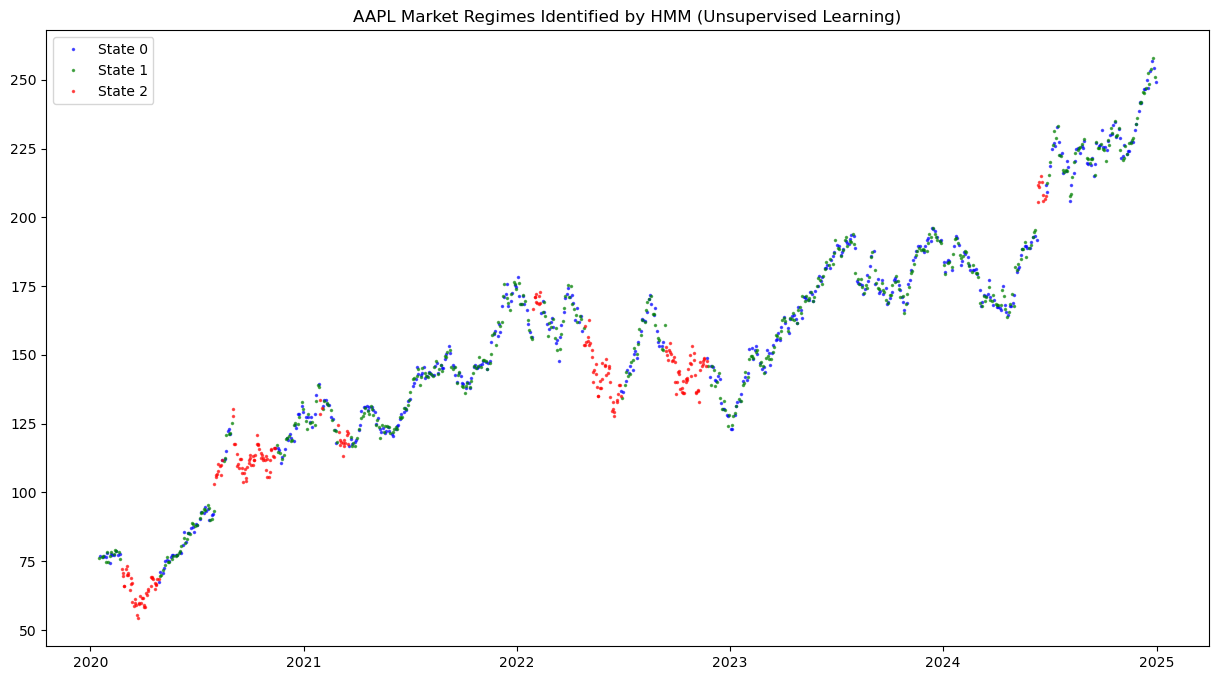

In [19]:
### 6.Visualization
plt.figure(figsize=(15,8))
color = ['blue','green','red']
for i in range(model.n_components):
    mask = data['State'] == i
    plt.plot(data.index[mask], data['Close'][mask], '.', 
             markersize=3, label=f'State {i}', color=color[i], alpha=0.6)

plt.title("AAPL Market Regimes Identified by HMM (Unsupervised Learning)")
plt.legend()
plt.savefig("Figure_1_HMM_for_AAPL.png", dpi=300, bbox_inches='tight')
plt.show()